### Detail task description

Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies.

### Loading Required Libraries

In [2]:
import numpy as np # For data manipulation
import pandas as pd # For handling dataframes
import matplotlib.pyplot as plt # For plotting
import seaborn as sns # For plotting
from sklearn.metrics import f1_score # Model Evaluation
from sklearn import tree # Decision Tree
from sklearn.model_selection import cross_val_score, train_test_split # Cross Validation and Splitting Test/Tra
from sklearn import neighbors # K Nearrest Neighbors'
from sklearn.preprocessing import MinMaxScaler # Normalization Min-Max
from sklearn.preprocessing import StandardScaler # Normalization Min-Max
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.metrics import classification_report # Model Evaluation
from sklearn.model_selection import GridSearchCV # Parameter Tuning
from sklearn.svm import SVR # SVM Regression
from sklearn.model_selection import KFold # For Cross Validation
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import ElasticNet # Regression with Regularization - ElasticNet
from sklearn.neural_network import MLPRegressor # Neueral Networks
import xgboost # Ensemble Method - XGBoost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error # For evaluating regression
from sklearn.neighbors import KNeighborsClassifier

## Outline:

## 1. Data Description
 <b> 1.1 Data attributes <br></b>

## 2. Data cleaning

<b>2.1 Handle missing values <br></b>
<b>2.2 Numeric and categorical <br></b>
<b>2.3 Descriptive Data Analysis for numeric variables <br><br></b>

## 3. Exploratory Data Analysis

<b>3.1 Exploring the variables distribution <br></b>
3.1.1 Target Variable class balance <br>
3.1.2 Numeric variables distribution <br> 
3.1.3 Numeric variables correlation matrix <br>
<b>3.2 Conversion rate to buy Term Deposit <br></b>
  3.2.1 Duration <br>
  3.2.2 Age Group <br>
  3.2.3 Account balance <br>
  3.2.4 Job categories <br>
  3.2.5 Housing Loan <br>
  3.2.6 Month <br><br>

## 4. Classification model

<b> 4.1 Train and test data split <br></b>
4.1.1 Splitting Target Variable and Predictors<br>
<b>4.2 Modelling <br></b>
  4.2.1 Decision Tree <br>
  4.2.2 K Nearest Neighbors (KNN) <br>
  4.2.3 Logistic Regression <br>
  4.2.4 SVC <br>
  4.2.5 XGBoost <br>
<b>4.3 Nested Cross Validation <br></b>
4.3.1 Comparing Model Performance to Select Best Model<br>
<b>4.4 Model evaluation <br></b>
4.4.1 Confusion Matrix <br>
4.4.2 Classification Report for best model<br>
4.4.3 ROC Curve <br>
4.4.4 Feature Importance

## 5. Recommendations

<b>5.1 Recommendation for marketing strategies <br></b>

# 1. Data Description

### 1.1 Dataset attributes

The dataset is about marketing capaign data of a Portuguese Bank after conducting phone calls with various customers on pitching a term deposit product (ie. CD).


#### Loading the Data

In [31]:
# Reading the data into DataFrame and remove double quotes

df = pd.read_csv("Marketing Campaign Data.csv", sep= '";"', encoding="utf-8", header = 0, index_col=False, names = ["age","job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"])
df = df.apply(lambda s:s.str.replace('"', ""))

In [32]:
# View the data size

df.shape

(42600, 17)

In [33]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,36,management,married,tertiary,no,101,yes,yes,unknown,5,may,426,1,-1,0,unknown,no
1,57,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
2,54,services,married,secondary,yes,0,yes,no,unknown,6,may,138,3,-1,0,unknown,no
3,51,blue-collar,married,secondary,no,50,yes,yes,unknown,6,may,121,1,-1,0,unknown,no
4,49,technician,married,unknown,no,15,no,no,unknown,6,may,92,2,-1,0,unknown,no


# 2. Data cleaning

#### Understanding the categorical values and check NULL values

In [34]:
print("age:\n" ,df["age"].unique())
print("job:\n" ,df["job"].unique())
print("marital\n",df["marital"].unique())
print("education\n",df["education"].unique())
print("default\n",df["default"].unique())
print("balance\n",df["balance"].unique())
print("housing\n",df["housing"].unique())
print("loan\n",df["loan"].unique())
print("contact\n",df["contact"].unique())
print("day\n",df["day"].unique())
print("month\n",df["month"].unique())
print("duration\n",df["duration"].unique())
print("campaign\n",df["campaign"].unique())
print("pdays\n",df["pdays"].unique())
print("previous\n",df["previous"].unique())
print("poutcome\n",df["poutcome"].unique())
print("y\n",df["y"].unique())

age:
 ['36' '57' '54' '51' '49' '39' '35' '42' '40' '44' '43' '27' '29' '55'
 '46' '41' '37' '31' '30' '47' '28' '32' '38' '26' '25' '53' '60' '34'
 '45' '50' '33' '58' '22' '21' '24' '48' '56' '52' '59' '66' '62' '67'
 '63' '64' '82' '73' '95' '77' '19' '76' '72' '74' '84' '23' '65' '70'
 '61' '75' '79' '83' '71' 'NULL' '78' '18' '68' '20' '80' '81' '85' '69'
 '86' '94' '93' '89' '88' '90']
job:
 ['management' 'technician' 'services' 'blue-collar' 'admin.' 'unemployed'
 'self-employed' 'retired' 'entrepreneur' 'student' 'housemaid' 'unknown'
 'NULL']
marital
 ['married' 'single' 'divorced' 'NULL']
education
 ['tertiary' 'unknown' 'secondary' 'primary' 'NULL']
default
 ['no' 'yes']
balance
 ['101' '206' '0' ... '8402' '4196' '17332']
housing
 ['yes' 'no']
loan
 ['yes' 'no' 'NULL']
contact
 ['unknown' 'cellular' 'telephone']
day
 ['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29' '30' '2' '3' '4' '11' '17' '18' '24' '1' '10' '22' '25'
 '31']
month
 ['

There are 42,600 observations in this dataset. Each represents an existing client the bank called by phone to sell the term deposit. 

#### Customer bank data:
1. <b>age</b>: (numeric) <br>
2. <b>job</b>: (categorical) - management, technician, services, blue-collar, admin, unemployed, self-employed, retired, entrepreneur, student, housemaid, unknown, NULL<br>
3. <b>marital</b>: (categorical) - married, single, divorced, NULL<br>
4. <b>education</b>: (categorical) - tertiary, unknown, secondary, primary, NULL<br>
5. <b>default</b>: Any credit in default? (cateogrical) - yes, no <br>
6. <b>balance</b>: Bank account balance (numeric) <br>
7. <b>housing</b>: Any housing loan? (categorical) - yes, no <br>
8. <b>loan</b>: Any personal loan? (categorical) - yes, no, NULL <br>

#### Last contact of market campaign:
9. <b>contact</b>: Communication type (categorical) - cellular, telephone, unknown<br>
10. <b>day</b>: Contact day (numeric) - 1 to 31 <br>
11. <b>month</b>: Contact month (categorical) -  jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec<br>
12. <b>duration</b>: Contact duration in seconds (numeric) <br>

#### Other attributes:
13. <b>campaign</b>: # of contacts performed (numeric) <br>
14. <b>pdays</b>: # of days contacted from previous campaign call (numeric) <br>
15. <b>previous</b>: # of contacts performed before this campaign and for this client (numeric) <br>
16. <b>poutcome</b>: outcome of previous marketing campaign (categorical) - success, failure, unknown, other <br>

#### Target variable
17. <b>y</b>: Did the customer buy a term deposit? (categorical) - yes, no

There are 42,600 observations in this dataset. Each represents an existing client the bank called by phone to sell the term deposit. 

#### Customer bank data:
1. <b>age</b>: (numeric) <br>
2. <b>job</b>: (categorical) - management, technician, services, blue-collar, admin, unemployed, self-employed, retired, entrepreneur, student, housemaid, unknown, NULL<br>
3. <b>marital</b>: (categorical) - married, single, divorced, NULL<br>
4. <b>education</b>: (categorical) - tertiary, unknown, secondary, primary, NULL<br>
5. <b>default</b>: Any credit in default? (cateogrical) - yes, no <br>
6. <b>balance</b>: Bank account balance (numeric) <br>
7. <b>housing</b>: Any housing loan? (categorical) - yes, no <br>
8. <b>loan</b>: Any personal loan? (categorical) - yes, no, NULL <br>

#### Last contact of market campaign:
9. <b>contact</b>: Communication type (categorical) - cellular, telephone, unknown<br>
10. <b>day</b>: Contact day (numeric) - 1 to 31 <br>
11. <b>month</b>: Contact month (categorical) -  jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec<br>
12. <b>duration</b>: Contact duration in seconds (numeric) <br>

#### Other attributes:
13. <b>campaign</b>: # of contacts performed (numeric) <br>
14. <b>pdays</b>: # of days contacted from previous campaign call (numeric) <br>
15. <b>previous</b>: # of contacts performed before this campaign and for this client (numeric) <br>
16. <b>poutcome</b>: outcome of previous marketing campaign (categorical) - success, failure, unknown, other <br>

#### Target variable
17. <b>y</b>: Did the customer buy a term deposit? (categorical) - yes, no

#### 2.1 Handle missing values

It is hard to just fill in mean, median or mode in this scenrio because we have missing values in both categorical and numeric data, so I will remove all the rows with NULL values, which is around 20% of data.

Compared with the class balance before we remove NaN values, it's only 0.1% difference so removing NaN values did not have great difference on target variable balance so I will go ahead to remove the null values.

In [35]:
print("Before removing NaN class balance, how many percent bought the term deposit\n",
      (df['y'].value_counts()['yes'] / (df['y'].value_counts()['yes'] + df['y'].value_counts()['no']))*100,
     "%\n")

df_remove_na = df[df != 'NULL']
df_remove_na = df_remove_na.dropna()

print("Before removing NaN class balance, how many percent bought the term deposit\n", 
      (df_remove_na['y'].value_counts()['yes'] / (df_remove_na['y'].value_counts()['yes'] + df_remove_na['y'].value_counts()['no'])) *100,
     "%\n")

Before removing NaN class balance, how many percent bought the term deposit
 9.859154929577464 %

Before removing NaN class balance, how many percent bought the term deposit
 9.956059204440333 %



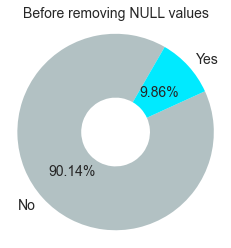

In [36]:
ratio = df.y.value_counts()

plt.figure(figsize = (4,4))

plt.pie(ratio, autopct='%1.2f%%', 
        pctdistance = 0.6, colors = ['#B2C1C3', '#00EAFF'],
        startangle = 60, wedgeprops = {'width' : 0.65}, textprops={'fontsize': 14}, labels = ['No', 'Yes'])
plt.title('Before removing NULL values', fontdict = {'fontsize':'14'})
plt.axis('square');

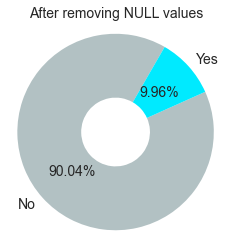

In [37]:
ratio = df_remove_na.y.value_counts()

plt.figure(figsize = (4,4))

plt.pie(ratio, autopct='%1.2f%%', 
        pctdistance = 0.6, colors = ['#B2C1C3', '#00EAFF'],
        startangle = 60, wedgeprops = {'width' : 0.65}, textprops={'fontsize': 14}, labels = ['No', 'Yes'])
plt.title('After removing NULL values', fontdict = {'fontsize':'14'})
plt.axis('square');

In [38]:
# Remove Null values and drop NaN
df = df[df != 'NULL']

#df['age'] = df['age'].fillna(40.9)
df = df.dropna()

#### 2.3 Numeric and categorical

In [39]:
# Convert numberic data to int data type

df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)

# Convert months into integers for analysis
df['month'] = df['month'].replace(['jan'], [1])
df['month'] = df['month'].replace(['feb'], [2])
df['month'] = df['month'].replace(['mar'], [3])
df['month'] = df['month'].replace(['apr'], [4])
df['month'] = df['month'].replace(['may'], [5])
df['month'] = df['month'].replace(['jun'], [6])
df['month'] = df['month'].replace(['jul'], [7])
df['month'] = df['month'].replace(['aug'], [8])
df['month'] = df['month'].replace(['sep'], [9])
df['month'] = df['month'].replace(['oct'], [10])
df['month'] = df['month'].replace(['nov'], [11])
df['month'] = df['month'].replace(['dec'], [12])

# Replace output Yes as '1' and No as '0'
df['y'] = df['y'].replace(['yes'], [1])
df['y'] = df['y'].replace(['no'], [0])

numeric = df[['age','balance','day','month','duration','campaign','pdays','previous','y']]
categorical = df.drop(['age','balance','day','duration','campaign','pdays','previous'] , axis=1)

y_df = df[df['y'] == 1]
         
df.shape

(34592, 17)

In [40]:
# Checking the column types

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34592 entries, 0 to 39963
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        34592 non-null  int64 
 1   job        34592 non-null  object
 2   marital    34592 non-null  object
 3   education  34592 non-null  object
 4   default    34592 non-null  object
 5   balance    34592 non-null  int64 
 6   housing    34592 non-null  object
 7   loan       34592 non-null  object
 8   contact    34592 non-null  object
 9   day        34592 non-null  int64 
 10  month      34592 non-null  int64 
 11  duration   34592 non-null  int64 
 12  campaign   34592 non-null  int64 
 13  pdays      34592 non-null  int64 
 14  previous   34592 non-null  int64 
 15  poutcome   34592 non-null  object
 16  y          34592 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 4.8+ MB


#### 2.3 Descriptive Data Analysis for numeric variables 
<br>

1. Mean <b>age</b> is 40.7, standard deviation is pretty high - 10<br>
2. Mean <b>balance</b> is 1329, standard deviation is pretty high - 2981<br>
3. Mean <b> duration</b> is 257, standard deviation is pretty high - 259 <br>
<br>

The data balance might be skewed. 

In [13]:
numeric.describe()

,age,day,month,duration,campaign,pdays,previous,y
count,34592.000000,34592.000000,34592.000000,34592.000000,34592.000000,34592.000000,34592.000000,34592.000000
mean,40.683482,15.929290,6.103579,256.687616,2.825682,35.941171,0.505261,0.099561
std,10.161207,8.314277,2.359264,258.742139,3.192452,95.466821,2.349374,0.299418
min,18.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,8.000000,5.000000,102.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,16.000000,6.000000,178.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,21.000000,7.000000,317.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,31.000000,12.000000,4918.000000,63.000000,850.000000,275.000000,1.000000


# 3. Exploratory Data Analysis

### 3.1 Exploring the variables distributions

Let't look at the percentage of customers bought the term deposti after the market campiagn call

#### 3.1.1 Target Variable class balance

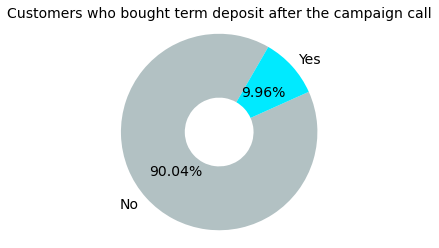

In [14]:
ratio = df.y.value_counts()

plt.figure(figsize = (4,4))

plt.pie(ratio, autopct='%1.2f%%', 
        pctdistance = 0.6, colors = ['#B2C1C3', '#00EAFF'],
        startangle = 60, wedgeprops = {'width' : 0.65}, textprops={'fontsize': 14}, labels = ['No', 'Yes'])
plt.title('Customers who bought term deposit after the campaign call', fontdict = {'fontsize':'14'})
plt.axis('square');

The class is highly imbalance - with 90.04% as 'No' and only 9.96% as 'Yes', which means - 

#### Of all the total campaign calls, only 9.96% have been converted to buy the term deposit

#### 3.1.2 Numeric variables distribution (age, balance, day, duration, campaign, pdays, previous)

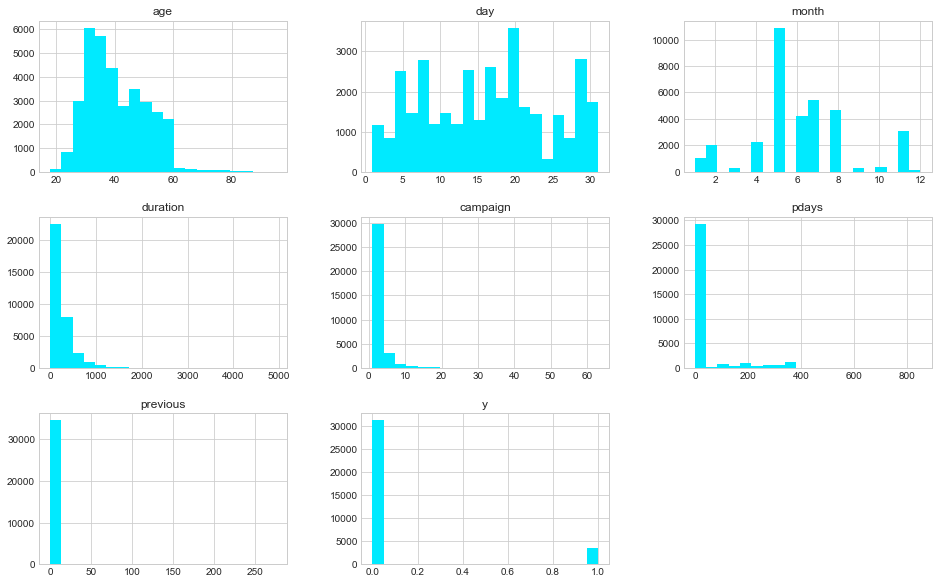

In [15]:
# Let's see how the numeric data is distributed.

plt.style.use('seaborn-whitegrid')

numeric.hist(bins=20, figsize=(16,10), color='#00EAFF')
plt.show()

#### 3.1.3 Numeric variables correlation matrix

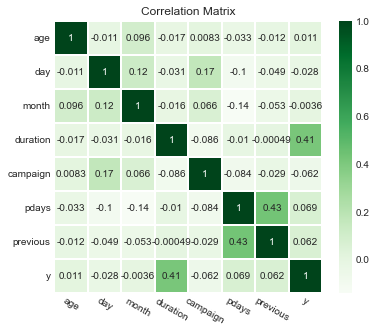

In [16]:
corr = numeric.corr()

cor_plot = sns.heatmap(corr,annot=True,cbar = True, cmap='Greens',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

To investigate more about correlation, a correlation matrix was plotted with all numberic variables. The call "duration" and "target variable" has a relatively strong correlation. That makes sense, the longer customer stay on the call, the more likely they will get solicited to buy the product. Lets dive deeper. There is a moderate correlation with “previous contacts”, “balance”, “month of contact” and “number of campaign”. 

Let's dive deeper into the influences on campaign outcome.

### 3.2 Conversion rate to buy Term Deposit

Conversion rate is used as a metric to look at how effective were the marketing calls. It is calculated as:

Total # of 'Yes' after the phone call
/
Total # of phone calls

#### 3.2.1 Conversion rate of 'Call Duration'

In [17]:
duration = numeric[['duration','y']]
duration_group = [duration]

for column in duration_group:
    column.loc[(column["duration"] >= 0) & (column["duration"] <= 120), 'duration_group'] = 'Under 2 mins'
    column.loc[(column["duration"] >= 121) & (column["duration"] <= 300), 'duration_group'] = '2 - 5 mins'
    column.loc[(column["duration"] >= 301) & (column["duration"] <= 900), 'duration_group'] = '5 - 15 mins'
    column.loc[(column["duration"] >= 901) & (column["duration"] <= 1800), 'duration_group'] = '15 - 30 mins'
    column.loc[column["duration"] >= 1801, 'duration_group'] = 'Above 30 mins'

In [18]:
duration_yes = duration['y'][duration['y'] == 1]
duration_no = duration['y'][duration['y'] == 0]

duration = duration[['y', 'duration_group']]
duration

,y,duration_group
0,0,5 - 15 mins
1,0,2 - 5 mins
2,0,2 - 5 mins
3,0,2 - 5 mins
4,0,Under 2 mins
...,...,...
39958,1,5 - 15 mins
39960,0,2 - 5 mins
39961,0,Under 2 mins
39962,0,2 - 5 mins


In [19]:
under2 = duration[duration['duration_group'] == 'Under 2 mins']
two_5 = duration[duration['duration_group'] == '2 - 5 mins']
five_16 = duration[duration['duration_group'] == '5 - 15 mins']
fifteen_30 = duration[duration['duration_group'] == '15 - 30 mins']
above_30 = duration[duration['duration_group'] == 'Above 30 mins']

under2_yes = under2[under2['y'] == 1].count()[0]
under2_no = under2[under2['y'] == 0].count()[0]

two_5_yes = two_5[two_5['y'] == 1].count()[0]
two_5_no = two_5[two_5['y'] == 0].count()[0]

five_16_yes = five_16[five_16['y'] == 1].count()[0]
five_16_no = five_16[five_16['y'] == 0].count()[0]

fifteen_30_yes = fifteen_30[fifteen_30['y'] == 1].count()[0]
fifteen_30_no = fifteen_30[fifteen_30['y'] == 0].count()[0]

above_30_yes = above_30[above_30['y'] == 1].count()[0]
above_30_no = above_30[above_30['y'] == 0].count()[0]

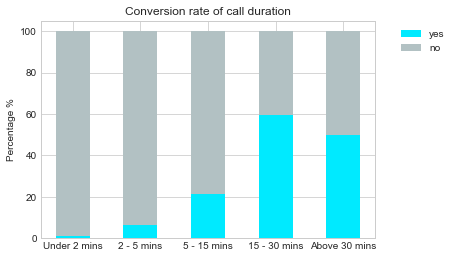

In [20]:
labels = ['Under 2 mins', '2 - 5 mins', '5 - 15 mins', '15 - 30 mins', 'Above 30 mins']
yes = [under2_yes / (under2_yes + under2_no) * 100,
       two_5_yes / (two_5_yes + two_5_no) * 100,
       five_16_yes / (five_16_yes + five_16_no) * 100,
       fifteen_30_yes / (fifteen_30_yes + fifteen_30_no) * 100,
       above_30_yes / (above_30_yes + above_30_no) * 100]
no = [under2_no / (under2_yes + under2_no) * 100,
      two_5_no / (two_5_yes + two_5_no) * 100,
      five_16_no / (five_16_yes + five_16_no) * 100,
      fifteen_30_no / (fifteen_30_yes + fifteen_30_no) * 100,
      above_30_no / (above_30_yes + above_30_no) * 100]

width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, yes, width, label='yes', color = '#00EAFF')
ax.bar(labels, no, width, bottom=yes, label='no', color = '#B2C1C3')

ax.set_ylabel('Percentage %')
ax.set_title('Conversion rate of call duration')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

<b> Observations: From the graph we can see the call duration of '15-30 mins' and 'Above 30 mins' are the most effective - with more than half of the customers would end up buy a term deposit.

#### 3.2.2 Conversion rate of 'Age group'

In [21]:
age = numeric[['age','y']]
age_group = [age]

for column in age_group:
    column.loc[column["age"] < 30,  'age_group'] = 'Below 30'
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = '30-39'
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = '40-49'
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = '50-59'
    column.loc[column["age"] >= 60, 'age_group'] = 'Above 60'

yes = age['y'][age['y'] == 1]
no = age['y'][age['y'] == 0]

age = age[['y', 'age_group']]
age

,y,age_group
0,0,30-39
1,0,50-59
2,0,50-59
3,0,50-59
4,0,40-49
...,...,...
39958,1,40-49
39960,0,Below 30
39961,0,40-49
39962,0,30-39


In [22]:
below30 = age[age['age_group'] == 'Below 30']
b30 = age[age['age_group'] == '30-39']
b40 = age[age['age_group'] == '40-49']
b50 = age[age['age_group'] == '50-59']
above60 = age[age['age_group'] == 'Above 60']

below30yes = below30[below30['y'] == 1].count()[0]
below30no = below30[below30['y'] == 0].count()[0]

b30yes = b30[b30['y'] == 1].count()[0]
b30no = b30[b30['y'] == 0].count()[0]

b40yes = b40[b40['y'] == 1].count()[0]
b40no = b40[b40['y'] == 0].count()[0]

b50yes = b50[b50['y'] == 1].count()[0]
b50no = b50[b50['y'] == 0].count()[0]

above60yes = above60[above60['y'] == 1].count()[0]
above60no = above60[above60['y'] == 0].count()[0]

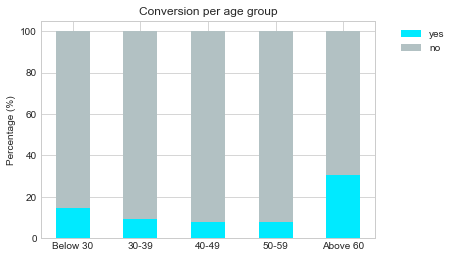

In [23]:
labels = ['Below 30', '30-39', '40-49', '50-59', 'Above 60']

yes = [below30yes / (below30yes + below30no) * 100, 
       b30yes / (b30yes + b30no) * 100, 
       b40yes / (b40yes + b40no) * 100, 
       b50yes / (b50yes + b50no) * 100, 
       above60yes / (above60yes + above60no) * 100]

no = [below30no / (below30yes + below30no) * 100, 
      b30no / (b30yes + b30no) * 100, 
      b40no / (b40yes + b40no) * 100, 
      b50no / (b50yes + b50no) * 100, 
      above60no / (above60yes + above60no) * 100]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, yes, width, label='yes', color = '#00EAFF')
ax.bar(labels, no, width, bottom=yes, label='no', color = '#B2C1C3')

ax.set_ylabel('Percentage (%)')
ax.set_title('Conversion per age group')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

<b> Observations: 96% of clients fall in age range of 20-60, the converstion rate is best for the age group 'Above 60' with 30% conversion, 'Below 30' seconds with a 18% conversion.

#### 3.2.3 Conversion rate of 'Account balance'

In [42]:
balance_group = numeric[['balance','y']]
balance_group = [balance]

for column in balance_group:
    column.loc[column["balance"] < 0,  'balance_group'] = 'Negative Balance'
    column.loc[(column["balance"] >= 0) & (column["balance"] <= 500), 'balance_group'] = '0-500'
    column.loc[(column["balance"] >= 501) & (column["balance"] <= 1500), 'balance_group'] = '501-1500'
    column.loc[(column["balance"] >= 1501) & (column["balance"] <= 3000), 'balance_group'] = '1501-3000'
    column.loc[column["balance"] >= 3001, 'balance_group'] = 'Over 3001'

balance_yes = balance['y'][balance['y'] == 1]
balance_no = balance['y'][balance['y'] == 0]

balance = balance[['y', 'balance_group']]
balance['balance_group'].value_counts()

0-500               15288
501-1500             8176
Over 3001            4170
1501-3000            3951
Negative Balance     3007
Name: balance_group, dtype: int64

In [43]:
neg = balance[balance['balance_group'] == 'Negative Balance']
bal_500 = balance[balance['balance_group'] == '0-500']
bal_1500 = balance[balance['balance_group'] == '501-1500']
bal_3000 = balance[balance['balance_group'] == '1501-3000']
above3001 = balance[balance['balance_group'] == 'Over 3001']

neg_yes = neg[neg['y'] == 1].count()[0]
neg_no = neg[neg['y'] == 0].count()[0]

bal_500_yes = bal_500[bal_500['y'] == 1].count()[0]
bal_500_no = bal_500[bal_500['y'] == 0].count()[0]

bal_1500_yes = bal_1500[bal_1500['y'] == 1].count()[0]
bal_1500_no = bal_1500[bal_1500['y'] == 0].count()[0]

bal_3000_yes = bal_3000[bal_3000['y'] == 1].count()[0]
bal_3000_no = bal_3000[bal_3000['y'] == 0].count()[0]

above3001_yes = above3001[above3001['y'] == 1].count()[0]
above3001_no = above3001[above3001['y'] == 0].count()[0]

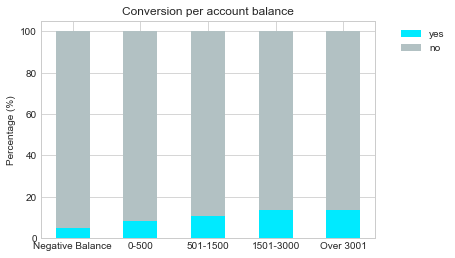

In [44]:
labels = ['Negative Balance', '0-500', '501-1500', '1501-3000', 'Over 3001']

yes = [neg_yes / (neg_yes + neg_no) * 100, 
       bal_500_yes / (bal_500_yes + bal_500_no) * 100, 
       bal_1500_yes / (bal_1500_yes + bal_1500_no) * 100, 
       bal_3000_yes / (bal_3000_yes + bal_3000_no) * 100, 
       above3001_yes / (above3001_yes + above3001_no) * 100]

no = [neg_no / (neg_yes + neg_no) * 100, 
      bal_500_no / (bal_500_yes + bal_500_no) * 100, 
      bal_1500_no / (bal_1500_yes + bal_1500_no) * 100, 
      bal_3000_no / (bal_3000_yes + bal_3000_no) * 100, 
      above3001_no / (above3001_yes + above3001_no) * 100]
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, yes, width, label='yes', color = '#00EAFF')
ax.bar(labels, no, width, bottom=yes, label='no', color = '#B2C1C3')

ax.set_ylabel('Percentage (%)')
ax.set_title('Conversion per account balance')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

<b> Observations: The variations in conversion rate per account balance is not quite apparent, most of the balance groups have a 15-18% conversion rate. the more the balance, the higher the conversion rate.

#### 3.2.4 Conversion rate of 'Job category'

In [46]:
job = categorical[['job','y']]
job

,job,y
0,management,0
1,technician,0
2,services,0
3,blue-collar,0
4,technician,0
...,...,...
39958,blue-collar,1
39960,self-employed,0
39961,management,0
39962,services,0


In [47]:
job_category = list(job.job.unique())
job_category

['management',
 'technician',
 'services',
 'blue-collar',
 'admin.',
 'unemployed',
 'self-employed',
 'retired',
 'entrepreneur',
 'student',
 'housemaid',
 'unknown']

In [48]:
#admin_yes = job[['admin']['y'] == 1].count()[0]

management = job[job['job'] == 'management']
management_yes = management[management['y'] == 1].count()[0]
management_no = management[management['y'] == 0].count()[0]

technician = job[job['job'] == 'technician']
technician_yes = technician[technician['y'] == 1].count()[0]
technician_no = technician[technician['y'] == 0].count()[0]

services = job[job['job'] == 'services']
services_yes = services[services['y'] == 1].count()[0]
services_no = services[services['y'] == 0].count()[0]

bluecollar = job[job['job'] == 'blue-collar']
bluecollar_yes = bluecollar[bluecollar['y'] == 1].count()[0]
bluecollar_no = bluecollar[bluecollar['y'] == 0].count()[0]

admin = job[job['job'] == 'admin.']
admin_yes = admin[admin['y'] == 1].count()[0]
admin_no = admin[admin['y'] == 0].count()[0]

unemployed = job[job['job'] == 'unemployed']
unemployed_yes = unemployed[unemployed['y'] == 1].count()[0]
unemployed_no = unemployed[unemployed['y'] == 0].count()[0]

selfemployed = job[job['job'] == 'self-employed']
selfemployed_yes = selfemployed[selfemployed['y'] == 1].count()[0]
selfemployed_no = selfemployed[selfemployed['y'] == 0].count()[0]

retired = job[job['job'] == 'retired']
retired_yes = retired[retired['y'] == 1].count()[0]
retired_no = retired[retired['y'] == 0].count()[0]

entrepreneur = job[job['job'] == 'entrepreneur']
entrepreneur_yes = entrepreneur[entrepreneur['y'] == 1].count()[0]
entrepreneur_no = entrepreneur[entrepreneur['y'] == 0].count()[0]

student = job[job['job'] == 'student']
student_yes = student[student['y'] == 1].count()[0]
student_no = student[student['y'] == 0].count()[0]

housemaid = job[job['job'] == 'housemaid']
housemaid_yes = housemaid[housemaid['y'] == 1].count()[0]
housemaid_no = housemaid[housemaid['y'] == 0].count()[0]

unknown = job[job['job'] == 'unknown']
unknown_yes = unknown[unknown['y'] == 1].count()[0]
unknown_no = unknown[unknown['y'] == 0].count()[0]

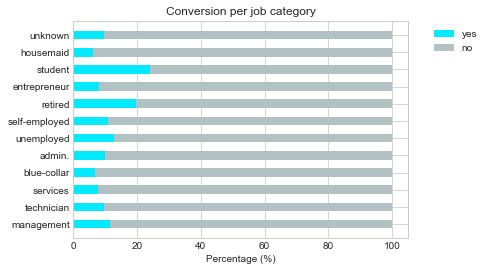

In [49]:
labels = job_category

yes = [management_yes / (management_yes + management_no) * 100, 
       technician_yes / (technician_yes + technician_no) * 100, 
       services_yes / (services_yes + services_no) * 100, 
       bluecollar_yes / (bluecollar_yes + bluecollar_no) * 100, 
       admin_yes / (admin_yes + admin_no) * 100,
       unemployed_yes / (unemployed_yes + unemployed_no) * 100,
       selfemployed_yes / (selfemployed_yes + selfemployed_no) * 100,
       retired_yes / (retired_yes + retired_no) * 100,
       entrepreneur_yes / (entrepreneur_yes + entrepreneur_no) * 100,
       student_yes / (student_yes + student_no) * 100,
       housemaid_yes / (housemaid_yes + housemaid_no) * 100,
       unknown_yes / (unknown_yes + unknown_no) * 100]

no = [management_no / (management_yes + management_no) * 100, 
       technician_no / (technician_yes + technician_no) * 100, 
       services_no / (services_yes + services_no) * 100, 
       bluecollar_no / (bluecollar_yes + bluecollar_no) * 100, 
       admin_no / (admin_yes + admin_no) * 100,
       unemployed_no / (unemployed_yes + unemployed_no) * 100,
       selfemployed_no / (selfemployed_yes + selfemployed_no) * 100,
       retired_no / (retired_yes + retired_no) * 100,
       entrepreneur_no / (entrepreneur_yes + entrepreneur_no) * 100,
       student_no / (student_yes + student_no) * 100,
       housemaid_no / (housemaid_yes + housemaid_no) * 100,
       unknown_no / (unknown_yes + unknown_no) * 100]
       
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, yes, width, label='yes', color = '#00EAFF')
ax.barh(labels, no, width, left=yes, label='no', color = '#B2C1C3')

ax.set_xlabel('Percentage (%)')
ax.set_title('Conversion per job category')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.show()

<b> Observations: In overall data, students and retirees are much more likely to open term deposit. 45% of clients above 60 years of age agreed to open term deposit. But we have only 2.5% of customers in this age group. It is recommended to include more of students, retirees and customers older than 60 years old to get a more targeted exposure from direct call marketing. 

#### 3.2.5 Conversion rate of 'Housing Loan (Yes/No)'

#### Housing has a -10.7% correlation with target variable, let's see how it is distributed.

In [50]:
# Replace output Yes as '1' and No as '0'

housing_cor = categorical[['housing','y']]

housing_cor['housing'] = housing_cor['housing'].replace(['yes'], [1])
housing_cor['housing'] = housing_cor['housing'].replace(['no'], [0])

housing_cor.corr(method="pearson")

,housing,y
housing,1.000000,-0.106899
y,-0.106899,1.000000


In [51]:
df["housing"].value_counts()/len(df)

yes    0.572791
no     0.427209
Name: housing, dtype: float64

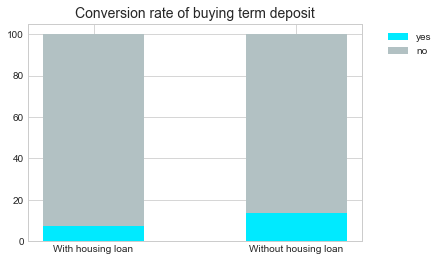

In [52]:
# house_category = list(categorical.housing.unique())
# job_category


labels = ['With housing loan', 'Without housing loan']

housing = categorical[['housing','y']]

with_housing_loan = housing[housing['housing'] == 'yes']
without_housing_loan = housing[housing['housing'] == 'no']

with_housing_loan_yes = with_housing_loan[with_housing_loan['y'] == 1].count()[0]
with_housing_loan_no = with_housing_loan[with_housing_loan['y'] == 0].count()[0]

without_housing_loan_yes = without_housing_loan[without_housing_loan['y'] == 1].count()[0]
without_housing_loan_no = without_housing_loan[without_housing_loan['y'] == 0].count()[0]

yes = [with_housing_loan_yes / (with_housing_loan_yes + with_housing_loan_no) * 100,
      without_housing_loan_yes / (without_housing_loan_yes + without_housing_loan_no) *100 ]

no = [with_housing_loan_no / (with_housing_loan_yes + with_housing_loan_no) * 100,
      without_housing_loan_no / (without_housing_loan_yes + without_housing_loan_no) *100 ]
       
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, yes, width, label='yes', color = '#00EAFF')
ax.bar(labels, no, width, bottom=yes, label='no', color = '#B2C1C3')

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.title('Conversion rate of buying term deposit', fontdict = {'fontsize':'14'})
plt.show()

<b> Observations: Customers tend to buy the term deposit when they do not have a housing loan, but the conversion difference is only around 5%. 

In [53]:
py_df = y_df[y_df['poutcome'] != 'unknown']
pp_df = df[df['poutcome'] != 'unknown']

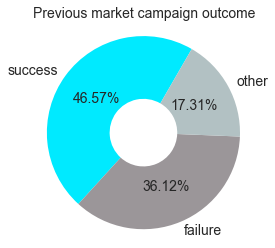

In [55]:
ratio = py_df.poutcome.value_counts()

plt.figure(figsize = (4,4))

plt.pie(ratio, autopct='%1.2f%%', 
        pctdistance = 0.6, colors = ['#00EAFF', '#9B9699', '#B2C1C3'],
        startangle = 60, wedgeprops = {'width' : 0.65}, textprops={'fontsize': 14}, labels =  ['success','failure','other'])
plt.title('Previous market campaign outcome', fontdict = {'fontsize':'14'})
plt.axis('square');

In [56]:
df.poutcome.value_counts()

unknown    29078
failure     3509
other       1255
success      750
Name: poutcome, dtype: int64

<b> 64% customers who bought product from previous marketing campaign will repeat their purchase again in the next market campaign, 17% more likely than in general.

#### 3.2.5 Conversion rate of 'Which month the call is conducted'

In [57]:
month = numeric[['month','y']]

total_call = month.groupby('month').count()
total_call = total_call['y'].values

total_yes = month[month['y'] == 1]
total_yes = total_yes.groupby('month').count()
total_yes = total_yes['y'].values

total_no = month[month['y'] == 0]
total_no = total_no.groupby('month').count()
total_no = total_no['y'].values

total_no

array([  960,  1702,   147,  1820, 10189,  3850,  5014,  4252,   125,
         196,  2842,    51])

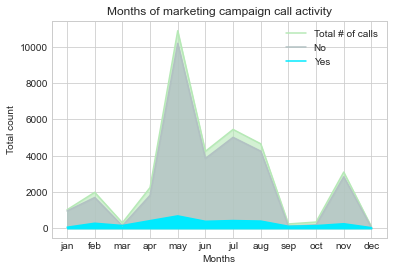

In [58]:
month_date = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# ay = total_call
# by = total_yes
# cy = total_no
# y = np.vstack([ay, by, cy])


# Create a df with a date-time index with data every hour

month_stats = ({'Month': month_date,
                'Total Yes': total_yes,
                'Total No': total_no})
                #'Total calls': total_yes + total_no})

month_stats = pd.DataFrame(data = month_stats)

# month_stats.plot.area(color=('#00EAFF', '#B2C1C3', '#ECF0F1'))
# plt.show()

# Plotting the Data

x1 = month_date
y1 = total_yes
y2 = total_no
y3 = total_call


plt.plot(x1, y3, label='Total # of calls', color = '#B6E9B6')
plt.fill_between(x1, y3, color = '#B6E9B6', alpha = 0.6) 

plt.plot(x1, y2, label='No', color = '#B2C1C3')
plt.fill_between(x1, y2, color = '#B2C1C3', alpha = 0.8)

plt.plot(x1, y1, label='Yes', color = '#00EAFF')
plt.fill_between(x1, y1, color = '#00EAFF')

  
plt.xlabel('Months')
plt.ylabel('Total count')
plt.title("Months of marketing campaign call activity")
  
plt.legend()

In [59]:
jan = month[month['month'] == 1]
jan_yes = jan[jan['y'] == 1].count()[0]
jan_no = jan[jan['y'] == 0].count()[0]

feb = month[month['month'] == 2]
feb_yes = feb[feb['y'] == 1].count()[0]
feb_no = feb[feb['y'] == 0].count()[0]

mar = month[month['month'] == 3]
mar_yes = mar[mar['y'] == 1].count()[0]
mar_no = mar[mar['y'] == 0].count()[0]

apr = month[month['month'] == 4]
apr_yes = apr[apr['y'] == 1].count()[0]
apr_no = apr[apr['y'] == 0].count()[0]

may = month[month['month'] == 5]
may_yes = may[may['y'] == 1].count()[0]
may_no = may[may['y'] == 0].count()[0]

jun = month[month['month'] == 6]
jun_yes = jun[jun['y'] == 1].count()[0]
jun_no = jun[jun['y'] == 0].count()[0]

jul = month[month['month'] == 7]
jul_yes = jul[jul['y'] == 1].count()[0]
jul_no = jul[jul['y'] == 0].count()[0]

aug = month[month['month'] == 8]
aug_yes = aug[aug['y'] == 1].count()[0]
aug_no = aug[aug['y'] == 0].count()[0]

sep = month[month['month'] == 9]
sep_yes = sep[sep['y'] == 1].count()[0]
sep_no = sep[sep['y'] == 0].count()[0]

oct = month[month['month'] == 10]
oct_yes = oct[oct['y'] == 1].count()[0]
oct_no = oct[oct['y'] == 0].count()[0]

nov = month[month['month'] == 11]
nov_yes = nov[nov['y'] == 1].count()[0]
nov_no = nov[nov['y'] == 0].count()[0]

dec = month[month['month'] == 12]
dec_yes = dec[dec['y'] == 1].count()[0]
dec_no = dec[dec['y'] == 0].count()[0]

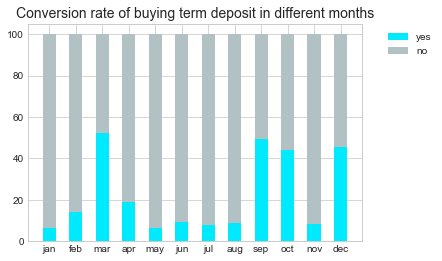

In [60]:
# house_category = list(categorical.housing.unique())
# job_category

labels = ['jan', 'feb', 'mar', 'apr', 'may', 'jun','jul', 'aug', 'sep', 'oct', 'nov', 'dec']

yes = [jan_yes / (jan_yes + jan_no) * 100,
      feb_yes / (feb_yes + feb_no) * 100,
      mar_yes / (mar_yes + mar_no) * 100,
      apr_yes / (apr_yes + apr_no) * 100,
      may_yes / (may_yes + may_no) * 100,
      jun_yes / (jun_yes + jun_no) * 100,
      jul_yes / (jul_yes + jul_no) * 100,
      aug_yes / (aug_yes + aug_no) * 100,
      sep_yes / (sep_yes + sep_no) * 100,
      oct_yes / (oct_yes + oct_no) * 100,
      nov_yes / (nov_yes + nov_no) * 100,
      dec_yes / (dec_yes + dec_no) * 100]

no = [jan_no / (jan_yes + jan_no) * 100,
      feb_no / (feb_yes + feb_no) * 100,
      mar_no / (mar_yes + mar_no) * 100,
      apr_no / (apr_yes + apr_no) * 100,
      may_no / (may_yes + may_no) * 100,
      jun_no / (jun_yes + jun_no) * 100,
      jul_no / (jul_yes + jul_no) * 100,
      aug_no / (aug_yes + aug_no) * 100,
      sep_no / (sep_yes + sep_no) * 100,
      oct_no / (oct_yes + oct_no) * 100,
      nov_no / (nov_yes + nov_no) * 100,
      dec_no / (dec_yes + dec_no) * 100]
       
width = 0.5       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, yes, width, label='yes', color = '#00EAFF')
ax.bar(labels, no, width, bottom=yes, label='no', color = '#B2C1C3')

ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Conversion rate of buying term deposit in different months', fontdict = {'fontsize':'14'})

plt.show()



<b> Observations: The month of highest level of campaign calls was the May. However, the conversion rate of this month is below 10%. The most effective months (ie. highest conversion rate) are March, September, October and December with conversion rate of approxiately 50%. 
    
Most calls were conducted in May. However, the conversion rate of this month is below 10%. 

The most effective months (ie. highest conversion rate) are March, September, October and December with conversion rate of 50%. 


### 4. Classification model

#### 4.1 Train and test data split

Before we can split the data, we need to convert categorical values into numeric values

One Hot Encoder:

In [62]:
temp_data = df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome'] , axis=1)

job = pd.get_dummies(df.job, prefix = 'job')
marital = pd.get_dummies(df.marital, prefix = 'marital')
education = pd.get_dummies(df.education, prefix = 'education')
default = pd.get_dummies(df.default, prefix = 'default')
housing = pd.get_dummies(df.housing, prefix = 'housing')
loan = pd.get_dummies(df.loan, prefix = 'loan')
contact = pd.get_dummies(df.contact, prefix = 'contact')
poutcome = pd.get_dummies(df.poutcome, prefix = 'poutcome')

df2 = pd.concat([temp_data, job, marital, education, default, housing, loan, contact, poutcome] , axis=1)

In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34592 entries, 0 to 39963
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  34592 non-null  int64
 1   balance              34592 non-null  int64
 2   day                  34592 non-null  int64
 3   month                34592 non-null  int64
 4   duration             34592 non-null  int64
 5   campaign             34592 non-null  int64
 6   pdays                34592 non-null  int64
 7   previous             34592 non-null  int64
 8   y                    34592 non-null  int64
 9   job_admin.           34592 non-null  uint8
 10  job_blue-collar      34592 non-null  uint8
 11  job_entrepreneur     34592 non-null  uint8
 12  job_housemaid        34592 non-null  uint8
 13  job_management       34592 non-null  uint8
 14  job_retired          34592 non-null  uint8
 15  job_self-employed    34592 non-null  uint8
 16  job_services         3

In [64]:
# Replace output Yes as '1' and No as '0'

loan_cor = categorical[['loan','y']]

loan_cor['loan'] = loan_cor['loan'].replace(['yes'], [1])
loan_cor['loan'] = loan_cor['loan'].replace(['no'], [0])

loan_cor.corr(method="pearson")

,loan,y
loan,1.000000,-0.055013
y,-0.055013,1.000000


In [65]:
df["loan"].value_counts()/len(df)

no     0.835945
yes    0.164055
Name: loan, dtype: float64

In [66]:
# Replace output Yes as '1' and No as '0'

default_cor = categorical[['default','y']]

default_cor['default'] = default_cor['default'].replace(['yes'], [1])
default_cor['default'] = default_cor['default'].replace(['no'], [0])

default_cor.corr(method="pearson")

,default,y
default,1.00000,-0.01621
y,-0.01621,1.00000


In [67]:
df["default"].value_counts()/len(df)

no     0.981181
yes    0.018819
Name: default, dtype: float64

#### 4.1 Splitting Target Variable and Predictors

In [68]:
X = df2.drop(['y'],axis=1)
y = df2.y

In [69]:
# A holdout test set with 20% of the data is kept for final testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2 Modeling - Initalizing Models and Parameter Grids

To account for Class Imbalance - we will use class_weight = 'balanced' wherever it is applicable.

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

#### 4.2.1 Decision Tree

We don't need to Normalize data for Decision Trees because of the nature of the algorithm

In [70]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
clf_dt.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = clf_dt.predict(X_test)

#### 4.2.2 K Nearest Neighbors (KNN)

In [71]:
from sklearn.ensemble import RandomForestClassifier
knn_clf = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
knn_clf.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = knn_clf.predict(X_test)

#### 4.2.3 Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
lr_clf =LogisticRegression()
lr_clf.fit(X_train,np.ravel(y_train,order='C'))
y_pred=lr_clf.predict(X_test)

#### 4.2.4 SVC

In [73]:
from sklearn.svm import SVC
svc_clf= SVC(kernel = 'sigmoid')
svc_clf.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc_clf.predict(X_test)

#### 4.2.5 XGBoost

Since XGBoost is a tree based model, we don't need need to Normalize the data

In [74]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb_clf.predict(X_test)

### 4.3 Nested Cross Validation

We have to build the best possible model for overall Precision.

### Model Metrics Evaulation - False Positive or False Negative

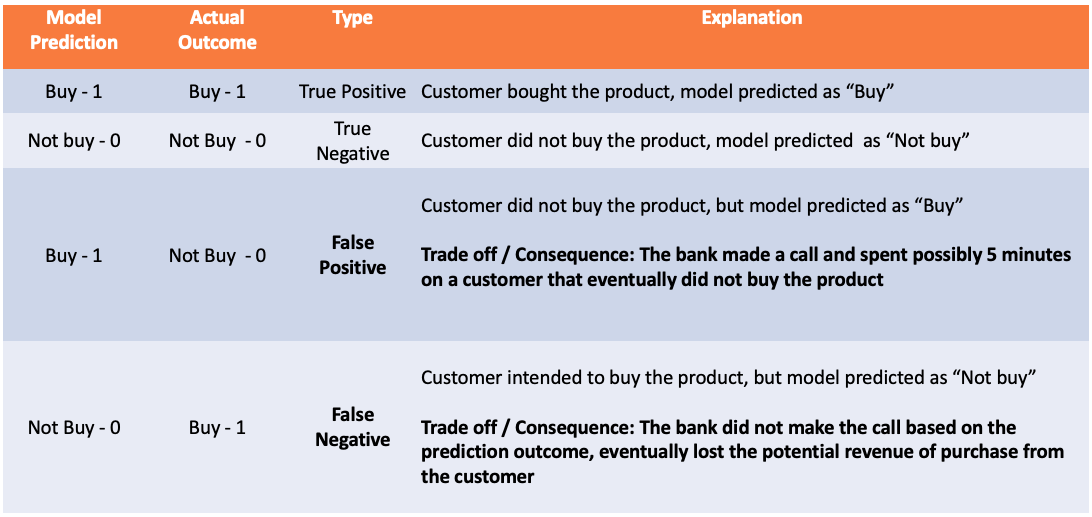

### Model Metrics - Precision or Recall?

<b>Precision:</b> Means how sure is the prediction of our model that the actual label is a "Yes". (Correctness of model)

<b>Recall:</b> Is the total number of "Yes" in the label column of the dataset. So how many "Yes" labels does our model detect.

In this exercise, we care about <b>Minimizing False Positive</b>, so we choose <b>Precision</b> as the metrics.

In [75]:
# Defining inner and outer Cross Validation Loops
inner_cv = KFold(n_splits=5, shuffle=True, random_state=10)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=11)

# Defining Scoring Criteria to optimize and select best model
score = 'precision'

# Outer Loop: Testing the performance of all 5 models
dt_scores = cross_val_score(clf_dt, X = X_train, y = y_train, scoring = score, cv = outer_cv)
dt_score = dt_scores.mean()
knn_scores = cross_val_score(knn_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
knn_score = knn_scores.mean()
lr_scores = cross_val_score(lr_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
lr_score = lr_scores.mean()
svc_scores = cross_val_score(svc_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
svc_score = svc_scores.mean()
xgb_scores = cross_val_score(xgb_clf, X = X_train, y = y_train, scoring = score, cv = outer_cv)
xgb_score = xgb_scores.mean()

#### 4.3.1 Comparing Model Performance to Select Best Model

In [76]:
print('Mean Precision of Decision Tree:', dt_score)
print('Standard Deviation for Decision Tree', round(np.std(dt_scores),4))
print('')
print('Mean Precision of KNN:', knn_score)
print('Standard Deviation for KNN', round(np.std(knn_scores),4))
print('')
print('Mean Precision of Logistic Regression:', lr_score)
print('Standard Deviation for Logistic Regression', round(np.std(lr_scores),4))
print('')
print('Mean Precision of SVC:', svc_score)
print('Standard Deviation for SVC', round(np.std(svc_scores),4))
print('')
print('Mean Precision of XGBoost:', xgb_score)
print('Standard Deviation for XGBoost', round(np.std(xgb_scores),4))
print('')

Mean Precision of Decision Tree: 0.44555833977668735
Standard Deviation for Decision Tree 0.0149

Mean Precision of KNN: 0.6366755180767842
Standard Deviation for KNN 0.0183

Mean Precision of Logistic Regression: 0.5722431516635644
Standard Deviation for Logistic Regression 0.0513

Mean Precision of SVC: 0.237026081295929
Standard Deviation for SVC 0.016

Mean Precision of XGBoost: 0.6333992567809291
Standard Deviation for XGBoost 0.0249



Comparing Accuracy of all the Parameter Tuned models in a 5 fold Cross Validation, XGBoost shows the highest mean performance for Precision. Hence, XGBoost is chosen as the best model for this problem.

### 4.4 Model Evaluation - XGBoost

#### 4.4.1 Confusion Matrix

[[6096  101]
 [ 599  123]]
{Precision}: 0.5491071428571429


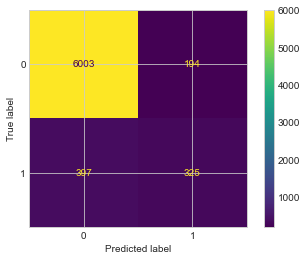

In [77]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

print(cnf_matrix)
print("{Precision}:",metrics.precision_score(y_test, y_pred))

y_pred = xgb_clf.predict(X_test)
plot_confusion_matrix(xgb_clf, X_test, y_test)
plt.show()

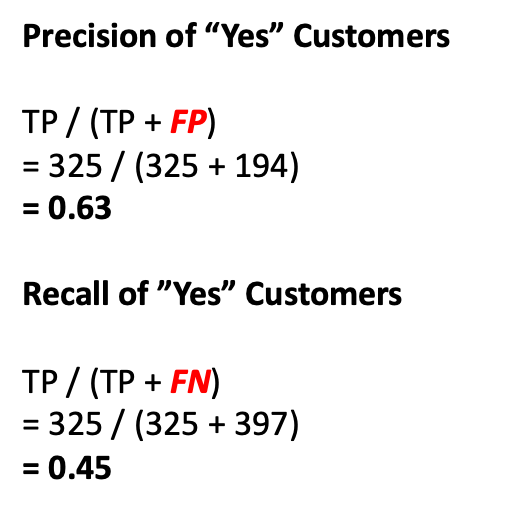

<b> Analyzing the confusion matrix: </b>

Looking at the confusion matrix which we got from all the models, there are two types of wrong values:

False Positive: Customer did not buy the product, but model predicted as “Buy” 
 
Trade off / Consequence: The bank made a call and spent possibly 5 minutes on a customer that eventually did not buy the product

False Negative: Customer intended to buy the product, but model predicted as “Not buy” 
 
Trade off / Consequence: The bank did not make the call based on the prediction outcome, eventually lost the potential revenue of purchase from the customer.

#### 4.4.2 Classification Report for best model

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6197
           1       0.63      0.45      0.52       722

    accuracy                           0.91      6919
   macro avg       0.78      0.71      0.74      6919
weighted avg       0.91      0.91      0.91      6919



The number false positives and false negatives is quite similar in the confusion matrix. Most of the predictions made by the model are correct.

#### 4.4.3 ROC Curve

In [79]:
# Predicted Probabilities
y_probs = xgb_clf.predict_proba(X_test)[:,1]

# Finding stats for ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, y_probs)

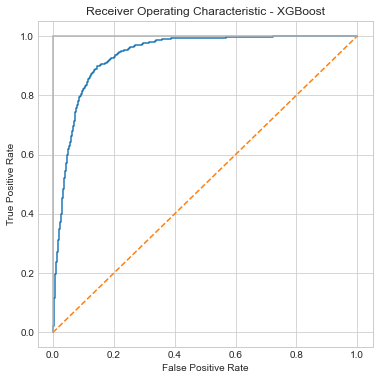

In [80]:
# ROC Curve

plt.figure(figsize=(6,6))
plt.title('Receiver Operating Characteristic - XGBoost')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve of the XGBoost Model is close to a perfect classifier. It performs much better than a random classifier.

#### 4.4.4 Feature Importance

In [81]:
d = xgb_clf.get_booster().get_score(importance_type="gain")

In [82]:
#Sorting the features in order
{k: v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)}

{'poutcome_success': 59.46043014526367,
 'contact_unknown': 17.058496475219727,
 'duration': 12.424847602844238,
 'housing_no': 8.676966667175293,
 'month': 7.73687744140625,
 'contact_cellular': 5.52030611038208,
 'loan_no': 5.02364444732666,
 'pdays': 4.392873764038086,
 'day': 4.221225261688232,
 'job_housemaid': 3.847476005554199,
 'poutcome_other': 3.8219540119171143,
 'job_student': 3.373944044113159,
 'job_self-employed': 3.179107666015625,
 'age': 3.0303404331207275,
 'job_retired': 3.012964963912964,
 'job_services': 2.9178264141082764,
 'job_management': 2.899876832962036,
 'job_blue-collar': 2.8936562538146973,
 'poutcome_failure': 2.8282172679901123,
 'education_unknown': 2.8215599060058594,
 'default_no': 2.7296392917633057,
 'marital_married': 2.7233755588531494,
 'education_tertiary': 2.6921591758728027,
 'job_admin.': 2.6841073036193848,
 'contact_telephone': 2.658267021179199,
 'job_entrepreneur': 2.6250154972076416,
 'job_technician': 2.555028200149536,
 'campaign': 2

# 5. Recommendations

### 5.1 Recommendation for Marketing Campaigns


<b>1. Best month to call:</b><br>
The month of highest level of campaign calls was the May. However, the conversion rate of this month is below 10%. The most effective months (ie. highest conversion rate) are March, September, October and December with conversion rate of approxiately 50%. For the next marketing campaign, we recommended the bank to focus the marketing campaign during the months of March, September, October and December to increase the conversion rate of a phone call.<br>


<b>2. Target groups: </b><br>

<b>Age: </b> 96% of clients fall in age range of 20-60, the converstion rate is best for the age group 'Above 60' with 30% conversion, 'Below 30' seconds with a 18% conversion. The next marketing campaign should target potential clients in their 30s and above 60. If the next campaign the bank addressed these two categories it would increase the likelihood of more term deposits suscriptions.<br><br>

<b> Job: </b> In overall data, students and retirees are much more likely to open term deposit. 45% of clients above 60 years of age agreed to open term deposit. But we have only 2.5% of customers in this age group. It is recommended to include more of students, retirees and customers older than 60 years old to get a more targeted exposure from direct call marketing. Retired people are more likely to put their cash in the bank as time deposit to gain interests. The next marketing campaign should focus more on these two categories of customers.<br><br>

<b>Housing Loan:</b> Customers tend to buy the term deposit when they do not have a housing loan, but the conversion difference is only around 5%, with that said, potential customers has a house loan might not have idle cash for a term deposit account. For the next campaign, the bank can target more people without a housing loan.  <br><br>

<b>Account Balance: </b><br> Even though The variations in conversion rate per account balance is not quite apparent, most of the balance groups have a 15-18% conversion rate, however, we see that potential clients in the average and account balances are more likely to open a term deposit. It is recommended that the marketing calls can focus on customers with a higher account balance. <br><br>

<b>3. Call Duration: </b><br>

We can see the call duration of '15-30 mins' and 'Above 30 mins' are the most effective - with more than half of the customers would end up buy a term deposit. The bank should train the marketing people on effectively closing deals when the call duration is more than 15 minutes, which would allow that the conversion rate of the next marketing campaign to be highly successful.<br>